In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
data_train=pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\S4DS\Task 3\TASK3-TRAIN.csv")
data_train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [23]:
data_train.shape

(58592, 44)

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

<Axes: xlabel='area_cluster', ylabel='count'>

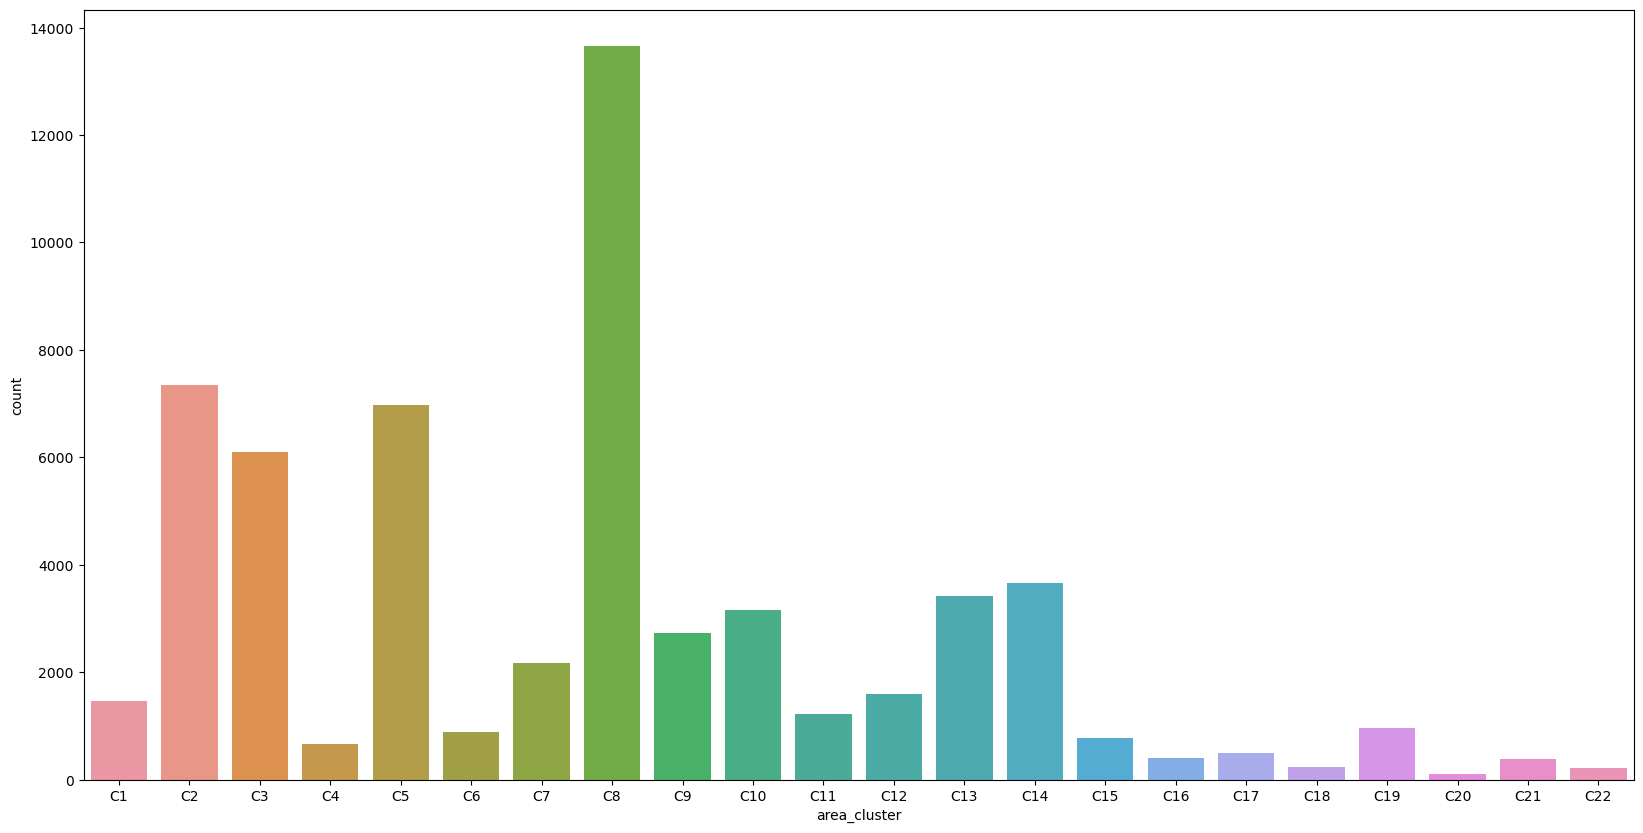

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='area_cluster',data=data_train)

<Axes: xlabel='population_density', ylabel='count'>

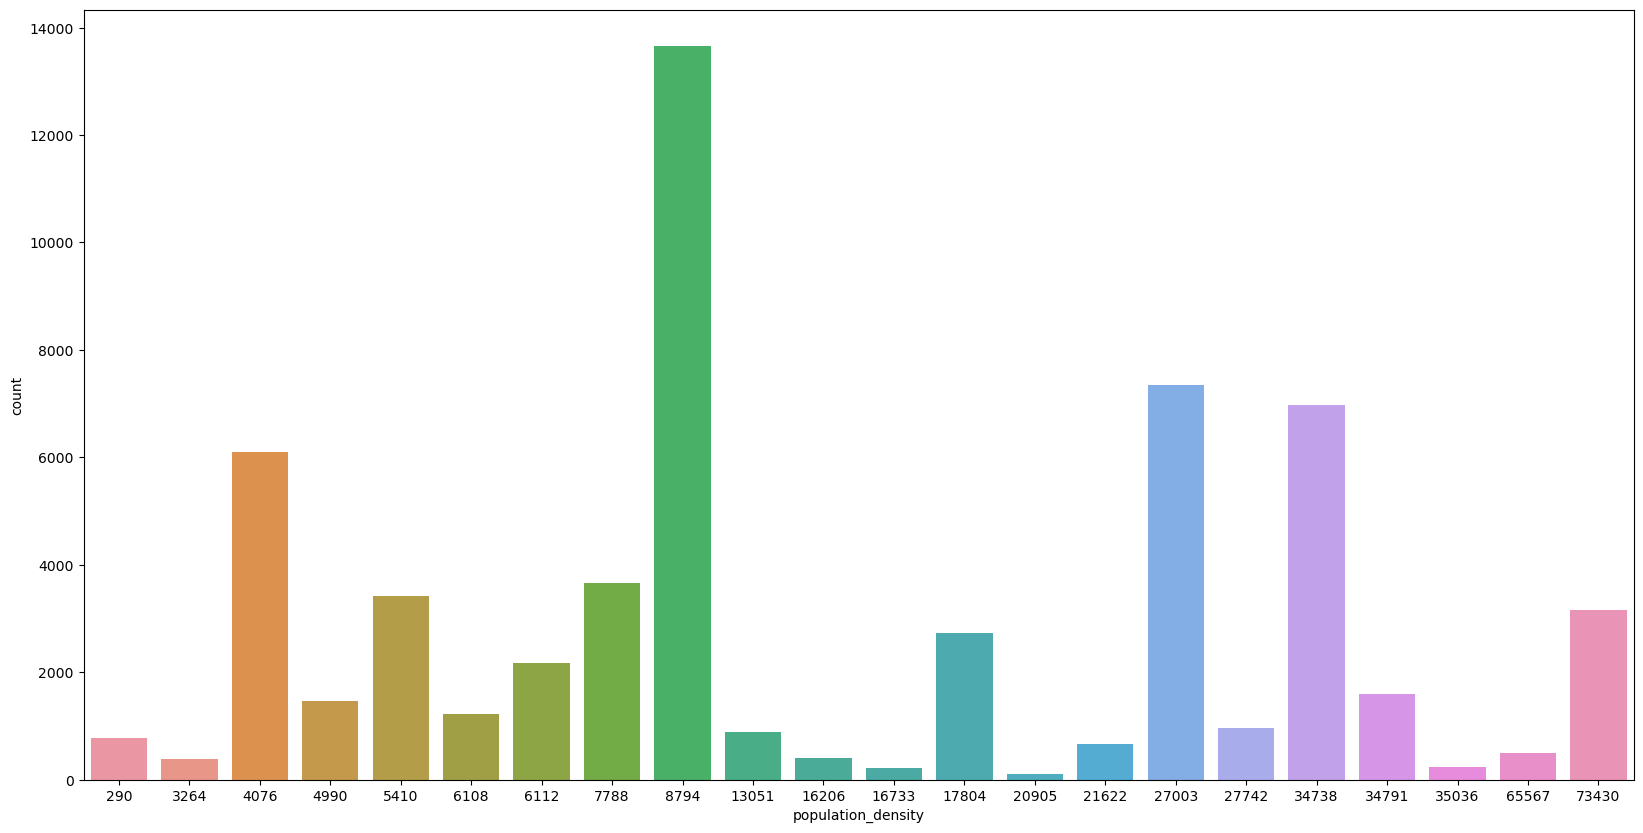

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='population_density',data=data_train)

<Axes: xlabel='segment', ylabel='count'>

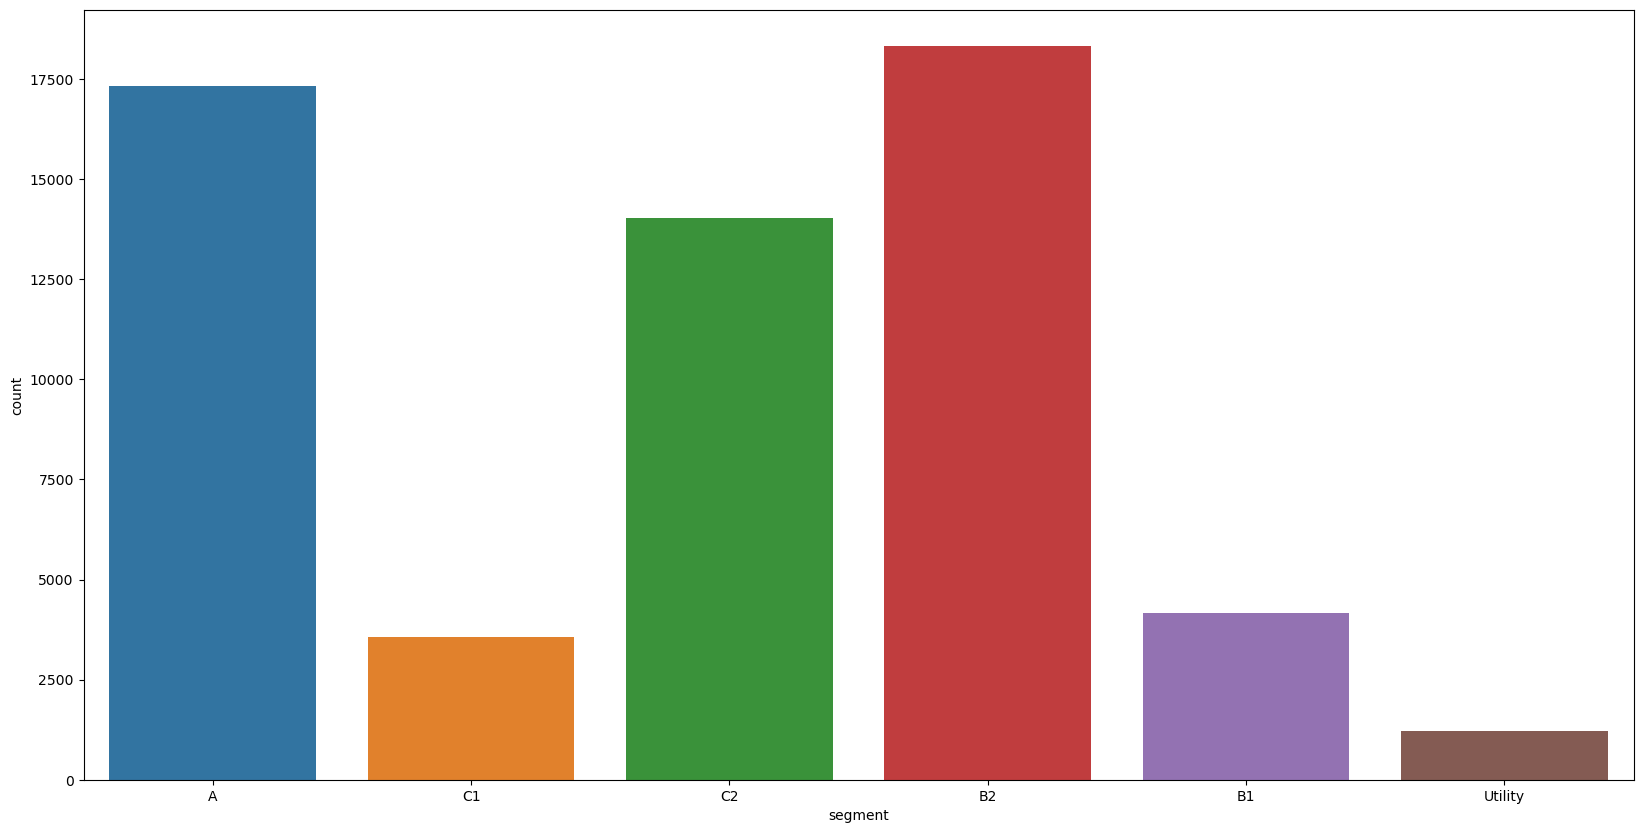

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x='segment',data=data_train)

<Axes: >

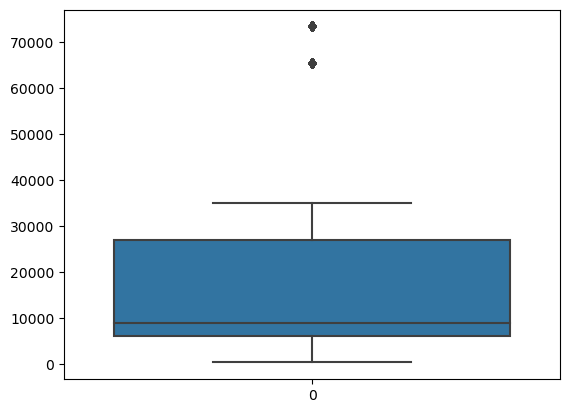

In [28]:
sns.boxplot(data_train['population_density'])

In [29]:
label_encode=LabelEncoder()
for column in data_train.columns:
    if data_train[column].dtype == 'object':
        data_train[column] = label_encode.fit_transform(data_train[column])
data_train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
58588,58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58589,58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58590,58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0


In [30]:
label_encode=LabelEncoder()
for column in data_test.columns:
    if data_test[column].dtype == 'object':
        data_test[column] = label_encode.fit_transform(data_test[column])
data_test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0,0.341732,0.00,0.586538,15,4076,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.307241,0.13,0.442308,20,8794,1,2,7,2,...,0,1,1,1,1,1,1,1,1,2
2,2,0.327924,0.12,0.451923,20,8794,2,0,4,2,...,0,0,1,1,1,0,1,1,1,2
3,3,0.782654,0.01,0.461538,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,1.233404,0.02,0.634615,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,...,0,1,1,1,1,1,1,1,1,2
39059,39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,...,1,1,1,1,1,1,0,1,1,3
39060,39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,...,1,1,1,1,1,1,1,1,1,0
39061,39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,...,1,1,1,1,1,1,1,1,1,2


In [31]:
X=data_train.drop('is_claim',axis=1)
Y=data_train.is_claim

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [33]:
eq=LogisticRegression()
eq.fit(X_train,Y_train)

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
equ=RandomForestClassifier()
equ.fit(X_train,Y_train)

RandomForestClassifier()

In [35]:
Y_test_predicted=eq.predict(X_test)
Y_test_predicted_=equ.predict(X_test)

In [37]:
accuracy=accuracy_score(Y_test,Y_test_predicted)
print(accuracy)
accuracy=accuracy_score(Y_test,Y_test_predicted_)
print(accuracy)

0.9359426555922176
0.935032426897258
